<a href="https://colab.research.google.com/github/mazhar75/CodeCasa/blob/main/HousingPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the data**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [35]:
 data_url = "http://lib.stat.cmu.edu/datasets/boston"
 raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
 data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
 target = raw_df.values[1::2, 2]


In [3]:
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [4]:
df['MEDV'] = target

In [5]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
df.head().T

,0,1,2,3,4
crim,0.00632,0.02731,0.02729,0.03237,0.06905
zn,18.00000,0.00000,0.00000,0.00000,0.00000
indus,2.31000,7.07000,7.07000,2.18000,2.18000
chas,0.00000,0.00000,0.00000,0.00000,0.00000
nox,0.53800,0.46900,0.46900,0.45800,0.45800
rm,6.57500,6.42100,7.18500,6.99800,7.14700
age,65.20000,78.90000,61.10000,45.80000,54.20000
dis,4.09000,4.96710,4.96710,6.06220,6.06220
rad,1.00000,2.00000,2.00000,3.00000,3.00000
tax,296.00000,242.00000,242.00000,222.00000,222.00000


In [8]:
df.shape

(506, 14)

EDA

**1.Plotting**

<Axes: xlabel='medv', ylabel='Count'>

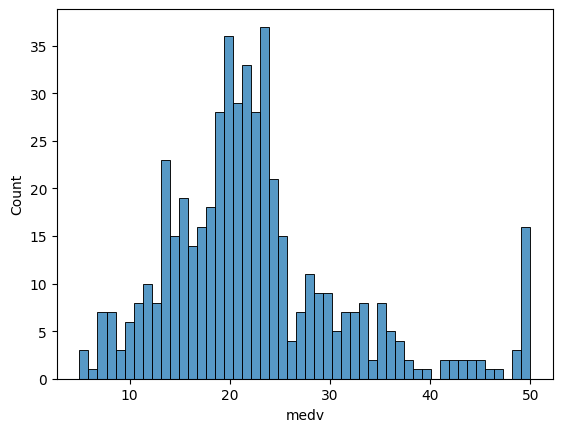

In [9]:
sns.histplot(df.medv,bins=50)

<Axes: xlabel='medv', ylabel='Count'>

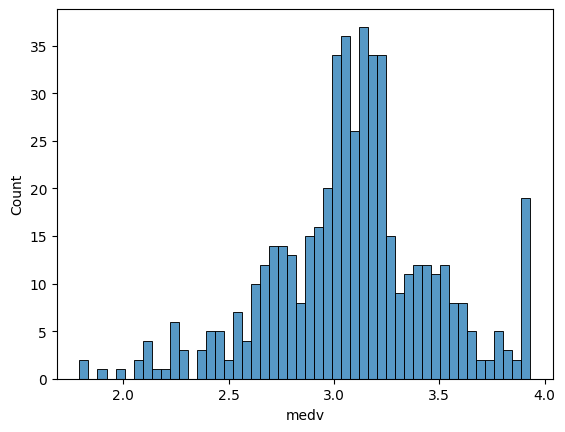

In [10]:
price_logs=np.log1p(df.medv)
sns.histplot(price_logs,bins=50)

**Correlation**

In [11]:
correlation_matrix = df.corr()

In [12]:
correlation_matrix["medv"].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

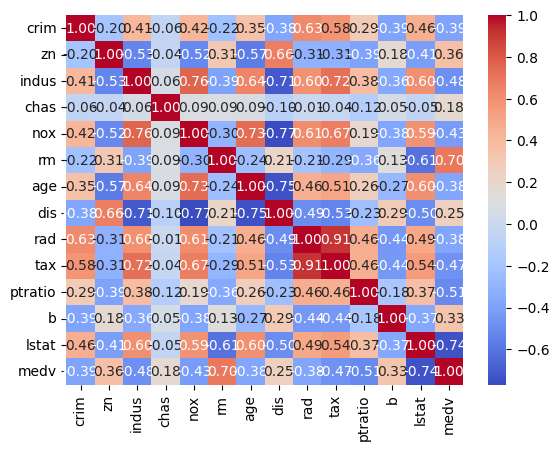

In [13]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

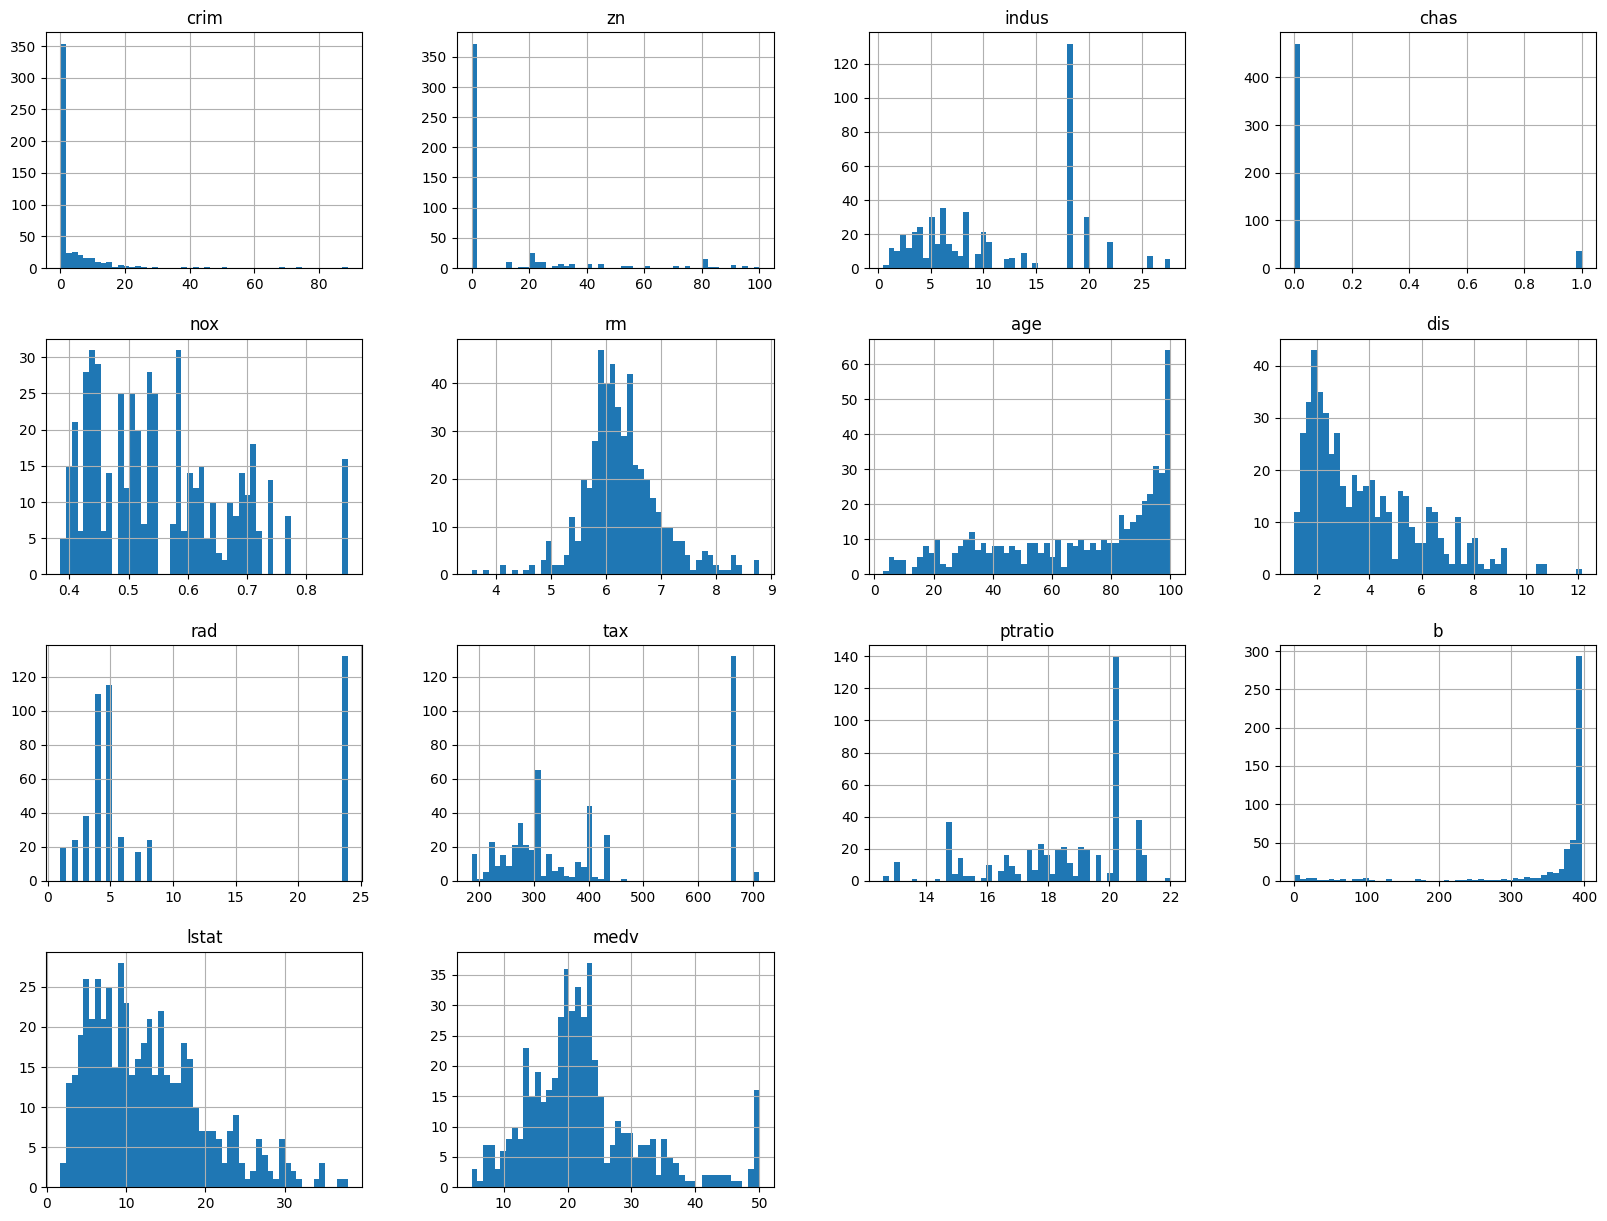

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**Linear regression using sklearn**

In [15]:
X = df.drop(['medv'], axis = 1)
y = df['medv']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
lm.intercept_

36.357041376595056

**Co-efficients for Training model**

In [19]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients' })
coeffcients

,Attribute,Coefficients
0,crim,-0.12257
1,zn,0.055678
2,indus,-0.008834
3,chas,4.693448
4,nox,-14.435783
5,rm,3.28008
6,age,-0.003448
7,dis,-1.552144
8,rad,0.32625
9,tax,-0.014067


**Model Evaluation**

In [20]:
y_pred = lm.predict(X_train)

In [21]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


Text(0.5, 1.0, 'Red color for prediction price & blue for actual price')

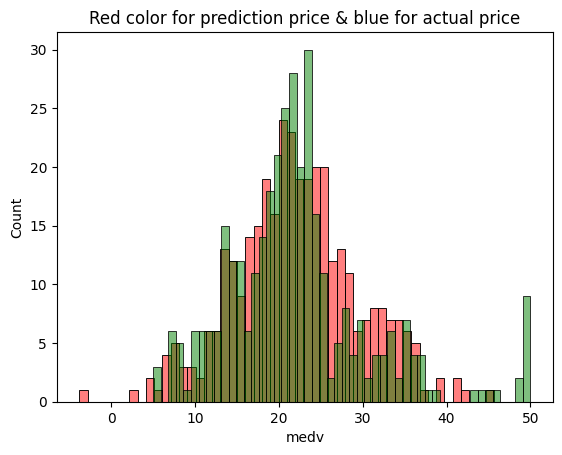

In [22]:
sns.histplot(y_pred ,color='red',alpha=0.5 ,bins=50)
sns.histplot(y_train ,color='green',alpha=0.5, bins=50)
plt.title("Red color for prediction price & blue for actual price")

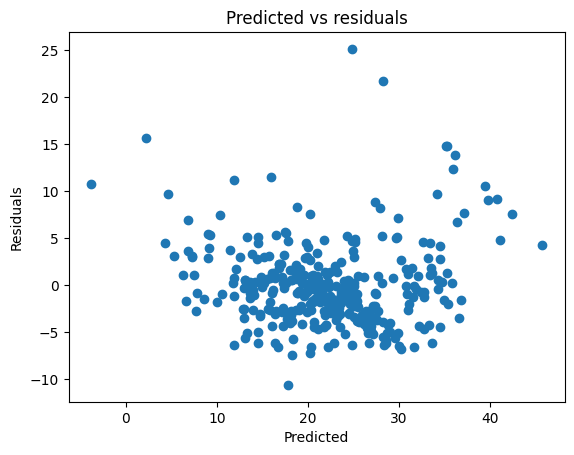

In [23]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

**Cross validation**

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
scores = cross_val_score(lm, X, y, cv=kf)

In [27]:
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.66875949 0.7342547  0.70986601 0.77595168 0.68727731]
Mean Score: 0.7152218388256875


**Testing**

In [28]:
y_test_pred=lm.predict(X_test)

In [29]:
print('R^2:',metrics.r2_score(y_test, y_test_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409181
MAE: 3.8590055923707487
MSE: 30.053993307124273
RMSE: 5.4821522513629874


**using the model**

In [33]:
sample = X_test.iloc[20].to_dict()
small_df=pd.DataFrame([sample])
pred=lm.predict(small_df)
pred,y_test.iloc[20]

(array([5.37422679]), 8.8)